<style>
    body{
        --vscode-font-family: "ComicSansMS"
    }
</style>
<p style="font-family:ComicSansMS; font-size: 48px;"> LEARN NLP</p>

### IMPORT LIBRARY

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv(r"C:\SEMESTER 5\STKI\study_sentimentAnalysis\data\train_dataset_20k.csv")

In [21]:
df.head()

,Sentiment,id,Date,Query,User,Tweet
0,4,2014351367,Wed Jun 03 01:14:33 PDT 2009,NO_QUERY,cathyleehart,@just_tam21 hahah its kind of the same as adel...
1,4,1984531826,Sun May 31 15:17:28 PDT 2009,NO_QUERY,carlawaslike,@Austinjamest sweeeet can't wait to go there w...
2,4,2185079853,Mon Jun 15 16:51:18 PDT 2009,NO_QUERY,Rommellll,You said you changed how wrong i proved you n...
3,4,1998128979,Mon Jun 01 18:02:23 PDT 2009,NO_QUERY,pauljopling,I can't wait for New Moon after seeing the tra...
4,4,2182994010,Mon Jun 15 13:54:26 PDT 2009,NO_QUERY,thisgoodlife,@nicolassa new drum carder? SWEET!


In [22]:
df = df.replace(4,1)

df['Sentiment']

0        1
1        1
2        1
3        1
4        1
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: Sentiment, Length: 20000, dtype: int64

In [23]:
df['Sentiment'].value_counts()

Sentiment
1    10017
0     9983
Name: count, dtype: int64

In [24]:
df.head()

,Sentiment,id,Date,Query,User,Tweet
0,1,2014351367,Wed Jun 03 01:14:33 PDT 2009,NO_QUERY,cathyleehart,@just_tam21 hahah its kind of the same as adel...
1,1,1984531826,Sun May 31 15:17:28 PDT 2009,NO_QUERY,carlawaslike,@Austinjamest sweeeet can't wait to go there w...
2,1,2185079853,Mon Jun 15 16:51:18 PDT 2009,NO_QUERY,Rommellll,You said you changed how wrong i proved you n...
3,1,1998128979,Mon Jun 01 18:02:23 PDT 2009,NO_QUERY,pauljopling,I can't wait for New Moon after seeing the tra...
4,1,2182994010,Mon Jun 15 13:54:26 PDT 2009,NO_QUERY,thisgoodlife,@nicolassa new drum carder? SWEET!


In [25]:
df['Tweet'].sample()

17683    brand new purple fairy pants  http://phunwears...
Name: Tweet, dtype: object

In [26]:
df.shape

(20000, 6)

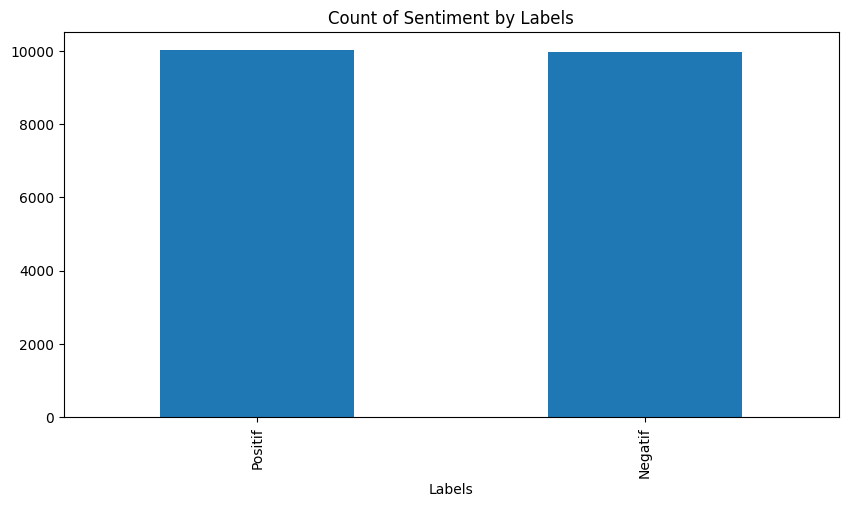

Sentiment
Positif    10017
Negatif     9983
Name: count, dtype: int64

In [27]:
table = df['Sentiment'].replace({1:'Positif',0:'Negatif'}).value_counts() \
        .plot(kind='bar',
              title='Count of Sentiment by Labels',
              figsize=(10,5))
table.set_xlabel('Labels')
plt.show()

df['Sentiment'].replace({1:'Positif',0:'Negatif'}).value_counts()

***NLTK***

In [28]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [29]:
import re
sentence = df['Tweet'][50]
# sentence = df['Tweet'].sample()
sentence

'@Jessicaca damn no way I can swing that. '

In [30]:
#Contoh penggunaan nltk

# sentence = 'Aku ingin makan Nasi'
import re
sentence = df['Tweet'][20]


lowercase_sentence = sentence.lower()
print("Sebelum ditokenisasi")
print('\n'+lowercase_sentence)

uppercase_sentence = sentence.upper()

print(uppercase_sentence)
import string 
import re #regex library
from nltk.tokenize import word_tokenize

tokens = nltk.tokenize.word_tokenize(lowercase_sentence)

print('\nSetelah di tokenisasi')
print(tokens)

from nltk.probability import FreqDist
freq_tokens = nltk.FreqDist(tokens)
print('Frequency Tokens : \n')
print(freq_tokens.most_common())


Sebelum ditokenisasi

@ursulajefferson yeah - not good for fbi - hope they can keep going 
@URSULAJEFFERSON YEAH - NOT GOOD FOR FBI - HOPE THEY CAN KEEP GOING 

Setelah di tokenisasi
['@', 'ursulajefferson', 'yeah', '-', 'not', 'good', 'for', 'fbi', '-', 'hope', 'they', 'can', 'keep', 'going']
Frequency Tokens : 

[('-', 2), ('@', 1), ('ursulajefferson', 1), ('yeah', 1), ('not', 1), ('good', 1), ('for', 1), ('fbi', 1), ('hope', 1), ('they', 1), ('can', 1), ('keep', 1), ('going', 1)]


VADER Sentiment Scoring

In [31]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [32]:
sia.polarity_scores("i am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [33]:
sia.polarity_scores('angry')

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5106}

In [34]:
#Run the polarty score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Tweet']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [35]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')

In [36]:
vaders.head(5)

,id,neg,neu,pos,compound,Sentiment,Date,Query,User,Tweet
0,2014351367,0.000,1.000,0.000,0.0000,1,Wed Jun 03 01:14:33 PDT 2009,NO_QUERY,cathyleehart,@just_tam21 hahah its kind of the same as adel...
1,1984531826,0.000,1.000,0.000,0.0000,1,Sun May 31 15:17:28 PDT 2009,NO_QUERY,carlawaslike,@Austinjamest sweeeet can't wait to go there w...
2,2185079853,0.193,0.807,0.000,-0.4767,1,Mon Jun 15 16:51:18 PDT 2009,NO_QUERY,Rommellll,You said you changed how wrong i proved you n...
3,1998128979,0.000,1.000,0.000,0.0000,1,Mon Jun 01 18:02:23 PDT 2009,NO_QUERY,pauljopling,I can't wait for New Moon after seeing the tra...
4,2182994010,0.000,0.498,0.502,0.6155,1,Mon Jun 15 13:54:26 PDT 2009,NO_QUERY,thisgoodlife,@nicolassa new drum carder? SWEET!


Plot VADER result

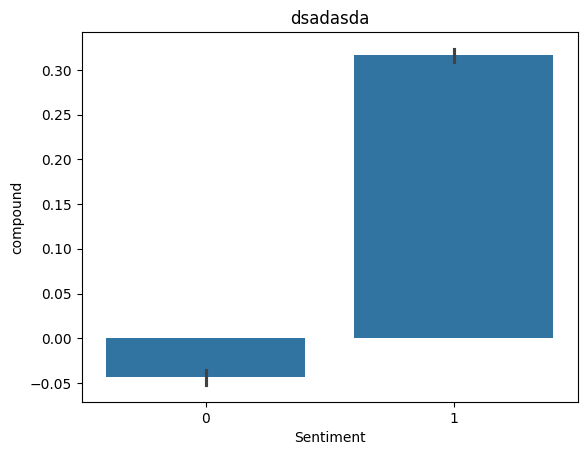

In [37]:
ax = sns.barplot(data = vaders, x='Sentiment',y ='compound')
ax.set_title('dsadasda')
plt.show()